In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
import lmfit as lm

plt.style.use('mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np


In [2]:
# import data from text file
import pandas as pds



ge_data = pds.read_csv("SuperCDMS/PhysRevD.99.062001-data/marchaprilnewnewnew.txt", skiprows=1, \
                         names=['time', 'blah'], \
                         delim_whitespace=False
                     )

ge_data = ge_data.sort_values(by='time')

print (ge_data.head(10))

t = np.asarray(ge_data["time"], dtype=np.float32)

print (t)


        time    blah
9   506.1574  5.2894
5   507.4013  5.9058
8   509.4632  5.6750
10  509.8995  5.2232
13  510.0812  5.0349
3   512.5145  6.3243
19  512.7067  4.2205
12  513.7324  5.0628
14  513.8779  4.9122
4   514.5219  6.1499
[ 506.1574  507.4013  509.4632  509.8995  510.0812  512.5145  512.7067
  513.7324  513.8779  514.5219  516.8201  517.7107  518.5185  519.2819
  519.8351  524.4211  525.2859  525.2859  526.9375  528.7008  529.4175
  530.1161  534.9125  535.2761  536.9121  537.7742  543.2328  550.717
  551.226   553.132   553.3139  553.7683  554.0956  557.6922  558.5466
  565.1764  566.9474  567.3552  571.5335  574.8757  576.3014  578.0828
  578.1919  580.6901  583.0324  584.7126  587.0472  593.4147  593.986
  594.7132  596.1207  602.9245  616.2568  616.7476  623.1592  623.5592
  627.683   627.9011  637.3381  637.8289  638.3016  638.3275  648.4008
  651.4703  651.517   652.3974  652.5064  660.6087  661.3799  661.4708
  665.4129  670.0093  674.8498  676.0211  678.1193  680.363  

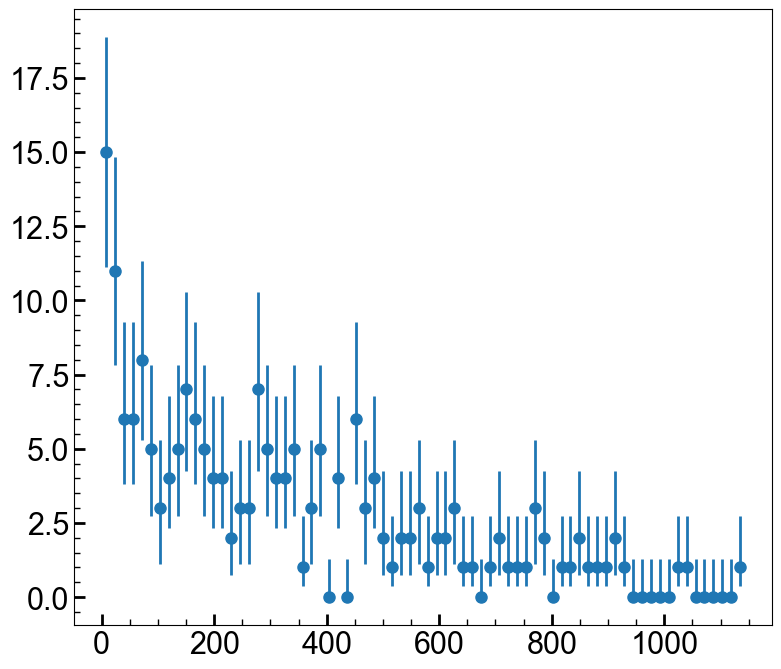

In [8]:

#plt.hist(t, bins=72)
#plt.show
#count = sum(t<=550 & t>=500) #help
#print(count)
error = (0,0)

#print(np.shape(error))
#if count == 0:
 #   error = (0.00, 1.29)
    
#if count == 1:
 #   error = (0.37, 2.75)

#if count == 2:
 #   error = (0.74, 4.25)

#if count == 3:
 #   error = (1.10, 5.30)

#if count == 4:
 #   error = (2.34, 6.78)
    
#if count == 5:
 #   error = (2.75, 7.81)
    
#if count == 6:
 #   error = (3.82, 9.28)
    
#if count == 7:
 #   error = (4.25, 10.30)
    
#if count == 8:
 #   error = (5.30, 11.32)
    
#if count == 9:
 #   error = (6.33, 12.79)
    
#if count == 12:
 #   error = (9.28, 17.30)
    
#weight = 1/(error[1]-error[0])
    
    
#matplotlib.pyplot.errorbar(t, yerr=error)
#fitbins=72
fitbins=72
min_t = np.min(t)
max_t = np.max(t-min_t)
t = t-min_t
counts, bins = np.histogram(t[t<=max_t],bins=fitbins)
thing = (bins[:-1]+bins[1:])/2
fig,axes = plt.subplots(1,1, figsize=(9,8))
error1 = [0.00,0.37,0.74,1.10,2.34,2.75,3.82,4.25,5.30,6.33,6.78,7.81,8.83,9.28]
error2 = [1.29,2.75,4.25,5.30,6.78,7.81,9.28,10.30,11.32,12.79,13.81,14.82,16.29,17.30]
ntot = counts
ntot_plus = np.zeros(np.shape(ntot))
ntot_minus = np.zeros(np.shape(ntot))
for i,ncount in enumerate(ntot):
    if ncount<=13:
        ntot_plus[i] = error2[ncount]-ncount
        ntot_minus[i] = ncount-error1[ncount]
    else:
        ntot_plus[i] = np.sqrt(ncount)
        ntot_minus[i] = np.sqrt(ncount)
ax1=axes
ax1.errorbar(thing, counts, yerr=[ntot_minus,ntot_plus], marker='o', markersize=8, linestyle = 'none')
plt.show(fig)


In [9]:
weight = (1/((ntot_plus+ntot_minus)/2))
print(weight)

[0.25819889 0.2853067  0.36630037 0.36630037 0.33222591 0.39525692
 0.47619048 0.45045045 0.39525692 0.33057851 0.36630037 0.39525692
 0.45045045 0.45045045 0.56980057 0.47619048 0.47619048 0.33057851
 0.39525692 0.45045045 0.45045045 0.39525692 0.84033613 0.47619048
 0.39525692 1.5503876  0.45045045 1.5503876  0.36630037 0.47619048
 0.45045045 0.56980057 0.84033613 0.56980057 0.56980057 0.47619048
 0.84033613 0.56980057 0.56980057 0.47619048 0.84033613 0.84033613
 1.5503876  0.84033613 0.56980057 0.84033613 0.84033613 0.84033613
 0.47619048 0.56980057 1.5503876  0.84033613 0.84033613 0.56980057
 0.84033613 0.84033613 0.84033613 0.56980057 0.84033613 1.5503876
 1.5503876  1.5503876  1.5503876  1.5503876  0.84033613 0.84033613
 1.5503876  1.5503876  1.5503876  1.5503876  1.5503876  0.84033613]


[0.08239322 0.07944172 0.07664539 0.07399607 0.07148604 0.06910797
 0.06685493 0.06472033 0.06269796 0.06078192 0.0589666  0.05724673
 0.05561727 0.05407348 0.05261086 0.05122513 0.04991225 0.04866839
 0.04748993 0.04637343 0.04531562 0.04431343 0.04336392 0.04246434
 0.04161205 0.04080457 0.04003954 0.03931473 0.03862802 0.03797742
 0.03736103 0.03677703 0.03622375 0.03569955 0.03520291 0.03473238
 0.03428658 0.03386423 0.03346408 0.03308496 0.03272578 0.03238548
 0.03206308 0.03175762 0.03146822 0.03119404 0.03093427 0.03068816
 0.03045498 0.03023407 0.03002477 0.02982647 0.0296386  0.02946061
 0.02929197 0.0291322  0.02898083 0.02883742 0.02870155 0.02857282
 0.02845085 0.0283353  0.02822583 0.02812211 0.02802384 0.02793074
 0.02784254 0.02775897 0.0276798  0.02760478 0.02753371 0.02746638
 0.02740259 0.02734215 0.02728489 0.02723064 0.02717924 0.02713055
 0.02708441 0.0270407  0.02699929 0.02696005 0.02692288 0.02688766
 0.02685429 0.02682268 0.02679273 0.02676435 0.02673747 0.0267

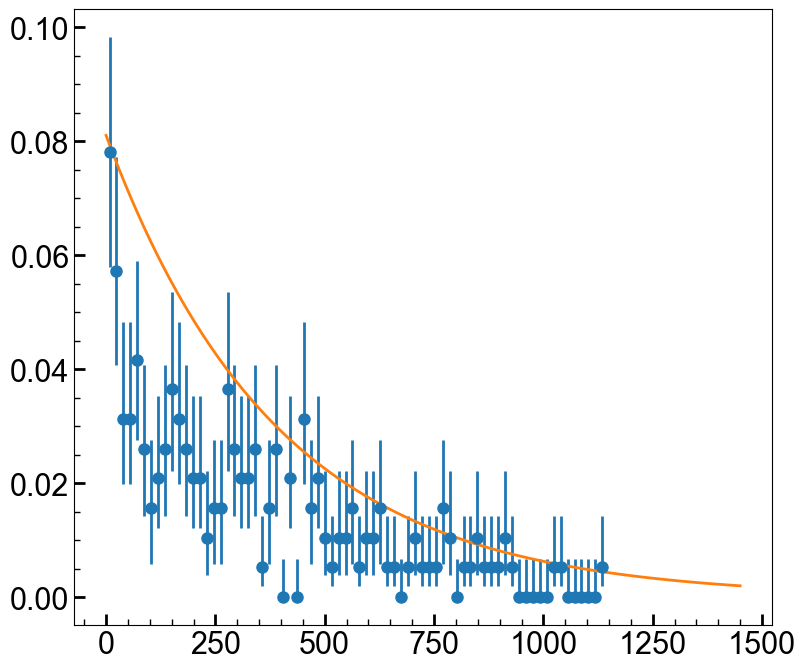

In [10]:
def function(t, tstop, alpha, b):
    return 30*((1/(1+b))*np.exp(-t/alpha)/(alpha*(1-np.exp(-tstop/alpha)))+b/tstop)
           
#print(function(1,2,3,4))
fig,axes = plt.subplots(1,1, figsize=(9,8))

ax1=axes
counts1 = counts/np.sum(counts)
weight1 = weight*np.sum(counts)
ax1.errorbar(thing, counts1, yerr=[ntot_minus/np.sum(counts),ntot_plus/np.sum(counts)], marker='o', markersize=8, linestyle = 'none')

#print(function(0,1450,271.2,1)*4000)
x = np.linspace(0,1450,num=100)
print (function(x,max_t,271.2,1))

ax1.plot(x,function(x,max_t,391.2,0))
plt.show(fig)

In [6]:
f_mod = lm.Model(function)
f_params = f_mod.make_params()               # define parameters

f_params.add('alpha',     vary=True,  value=390.0, min=0)  # half life

# amplitude
f_params.add('b', vary=True,  value=0,      min=0.0,max=100)  
# time
f_params.add('tstop',  vary=False,  value=1450)

#do the fitting
counts1 = counts/np.sum(counts)
weight1 = weight*np.sum(counts)
f_fit = f_mod.fit(counts1, f_params, t = thing, weights = weight1)

f_fit



/opt/anaconda3/envs/fano_pub_old_emcee/lib/python3.8/site-packages/lmfit/printfuncs.py:317: RuntimeWarning: divide by zero encountered in double_scalars
  spercent = f'({abs(par.stderr/par.value):.2%})'


[0.01758795 0.01697651 0.01638633 0.01581666 0.0152668  0.01473606
 0.01422376 0.01372928 0.01325198 0.01279128 0.0123466  0.01191737
 0.01150307 0.01110317 0.01071717 0.01034459 0.00998497 0.00963784
 0.00930279 0.00897938 0.00866721 0.0083659  0.00807506 0.00779434
 0.00752337 0.00726182 0.00700937 0.00676569 0.00653048 0.00630345
 0.00608431 0.0058728  0.00566863 0.00547156 0.00528134 0.00509774
 0.00492052 0.00474946 0.00458435 0.00442497 0.00427114 0.00412265
 0.00397933 0.00384099 0.00370746 0.00357857 0.00345416 0.00333408
 0.00321817 0.0031063  0.00299831 0.00289407 0.00279346 0.00269635
 0.00260261 0.00251213 0.0024248  0.0023405  0.00225913 0.00218059
 0.00210479 0.00203161 0.00196099 0.00189281 0.00182701 0.00176349
 0.00170219 0.00164301 0.00158589 0.00153076 0.00147754 0.00142618
 0.0013766  0.00132874 0.00128255 0.00123796 0.00119492 0.00115338
 0.00111328 0.00107458 0.00103722 0.00100116 0.00096636 0.00093276
 0.00090034 0.00086904 0.00083883 0.00080966 0.00078152 0.0007

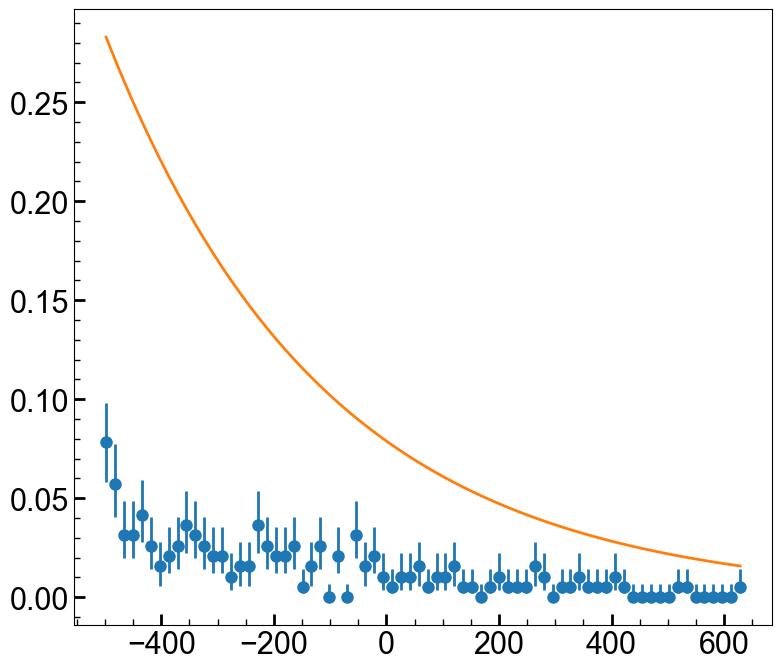

In [7]:
fig,axes = plt.subplots(1,1, figsize=(9,8))

ax1=axes
ax1.errorbar(thing, counts1, yerr=[ntot_minus/np.sum(counts),ntot_plus/np.sum(counts)], marker='o', markersize=8, linestyle = 'none')

#print(function(0,1450,271.2,1)*4000)
x = np.linspace(500,1450,num=100)
print (function(x,1450,271.2,0))

#ax1.plot(x,function(x,1450,419.277958,38.9762712))
ax1.plot(thing,f_fit.best_fit)
plt.show(fig)